In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore', category=UserWarning)



In [151]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head(10)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [153]:
df.info()
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
loan_id        

In [155]:
df.columns = df.columns.str.strip()
df.drop(columns=['loan_id'], inplace=True)


In [157]:
le = LabelEncoder()

df['education'] = le.fit_transform(df['education'])          # Graduate = 1, Not Graduate = 0
df['self_employed'] = le.fit_transform(df['self_employed'])  # Yes = 1, No = 0
df['loan_status'] = le.fit_transform(df['loan_status'])      # Approved = 1, Not Approved = 0


In [158]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


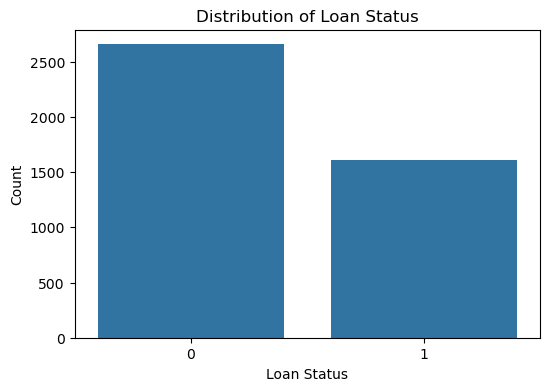

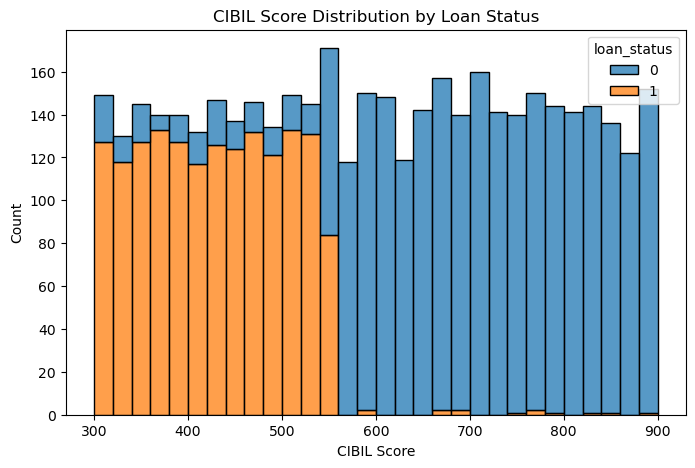

In [159]:
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(8,5))
sns.histplot(data=df, x='cibil_score', hue='loan_status', multiple='stack', bins=30)
plt.title('CIBIL Score Distribution by Loan Status')
plt.xlabel('CIBIL Score')
plt.ylabel('Count')
plt.show()


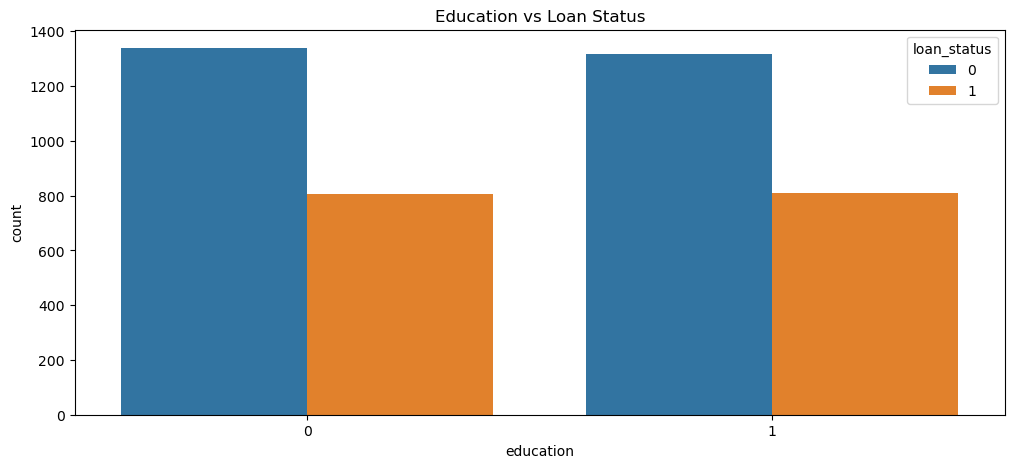

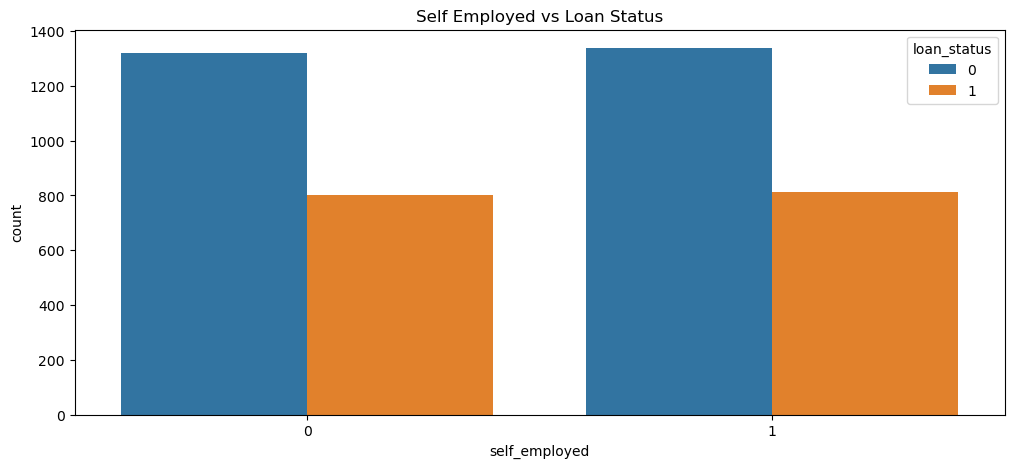

In [160]:
plt.figure(figsize=(12,5))
sns.countplot(x='education', hue='loan_status', data=df)
plt.title('Education vs Loan Status')
plt.show()

plt.figure(figsize=(12,5))
sns.countplot(x='self_employed', hue='loan_status', data=df)
plt.title('Self Employed vs Loan Status')
plt.show()


In [161]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'max_depth': [3, 4, 5],          
    'n_estimators': [50, 100, 150],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'reg_alpha': [0, 0.5, 1, 2],     
    'reg_lambda': [1, 1.5, 2, 3]    
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',      
    cv=3,                   
    verbose=2,
    n_jobs=-1              
)

grid_search.fit(X_train, y_train)

print("the best hyperparamater:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_test_pred = best_model.predict(X_test)
print("🔍 Test Accuracy with best params:", accuracy_score(y_test, y_test_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_test_pred))

y_train_pred = best_model.predict(X_train)
print("🎯 Training Accuracy with best params:", accuracy_score(y_train, y_train_pred))
print("\n📄 Classification Report:\n", classification_report(y_train, y_train_pred))


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
the best hyperparamater: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 50, 'reg_alpha': 2, 'reg_lambda': 1}
🔍 Test Accuracy with best params: 0.9847775175644028

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       531
           1       0.99      0.97      0.98       323

    accuracy                           0.98       854
   macro avg       0.99      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

🎯 Training Accuracy with best params: 0.9923865300146413

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2125
           1       1.00      0.98      0.99      1290

    accuracy                           0.99      3415
   macro avg       0.99      0.99      0.99      3415
weighted avg       0.99      0.99      0.99      3415



In [182]:
from sklearn.decomposition import PCA

#Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  PCA
pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# XGBoost && PCA-transformed data
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    max_depth=4,
    n_estimators=50,
    learning_rate=0.2,
    reg_alpha=2,
    reg_lambda=1
)

xgb_model.fit(X_train_pca, y_train)

#Evaluation
y_pred_xgb = xgb_model.predict(X_test_pca)
print("🔍 Test Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred_xgb))

y_train_pred = xgb_model.predict(X_train_pca)
print("🎯 Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("\n📄 Classification Report:\n", classification_report(y_train, y_train_pred))


🔍 Test Accuracy: 0.9508196721311475

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       531
           1       0.93      0.94      0.94       323

    accuracy                           0.95       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.95      0.95      0.95       854

🎯 Training Accuracy: 0.967203513909224

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      2125
           1       0.95      0.97      0.96      1290

    accuracy                           0.97      3415
   macro avg       0.96      0.97      0.97      3415
weighted avg       0.97      0.97      0.97      3415



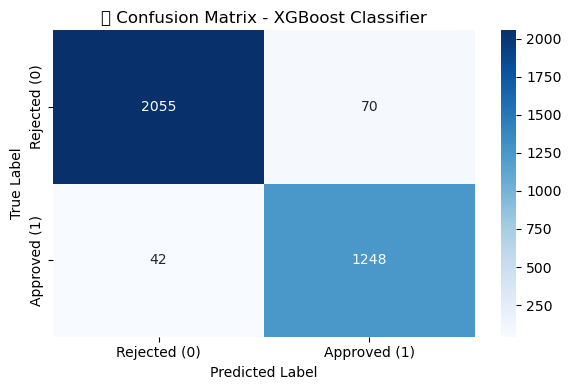

In [178]:
cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Rejected (0)", "Approved (1)"], 
            yticklabels=["Rejected (0)", "Approved (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("📉 Confusion Matrix - XGBoost Classifier")
plt.tight_layout()
plt.show()


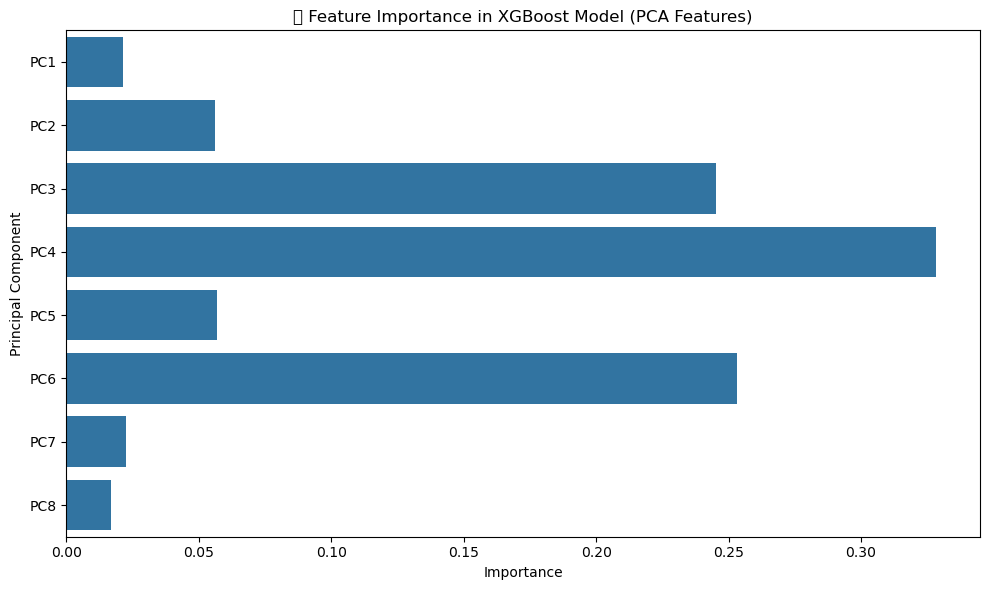

In [190]:
feature_importance = xgb_model.feature_importances_
pca_features = [f"PC{i+1}" for i in range(len(feature_importance))]  

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=pca_features)
plt.title("🔍 Feature Importance in XGBoost Model (PCA Features)")
plt.xlabel("Importance")
plt.ylabel("Principal Component")
plt.tight_layout()
plt.show()


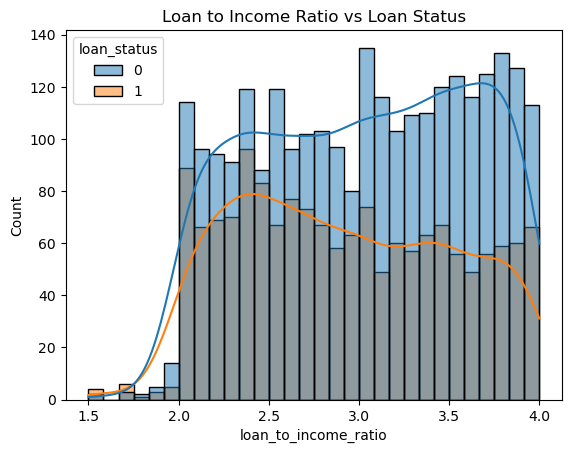

In [184]:
df['loan_to_income_ratio'] = df['loan_amount'] / df['income_annum']
sns.histplot(data=df, x='loan_to_income_ratio', hue='loan_status', bins=30, kde=True)
plt.title("Loan to Income Ratio vs Loan Status")
plt.show()


In [170]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
                          reg_alpha=2, reg_lambda=1, max_depth=4, learning_rate=0.2, n_estimators=50)

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:\n", scores)
print("Mean CV accuracy:\n", scores.mean())


Cross-validation accuracy scores:
 [0.98389458 0.97657394 0.98096633 0.97657394 0.98243045]
Mean CV accuracy:
 0.9800878477306002


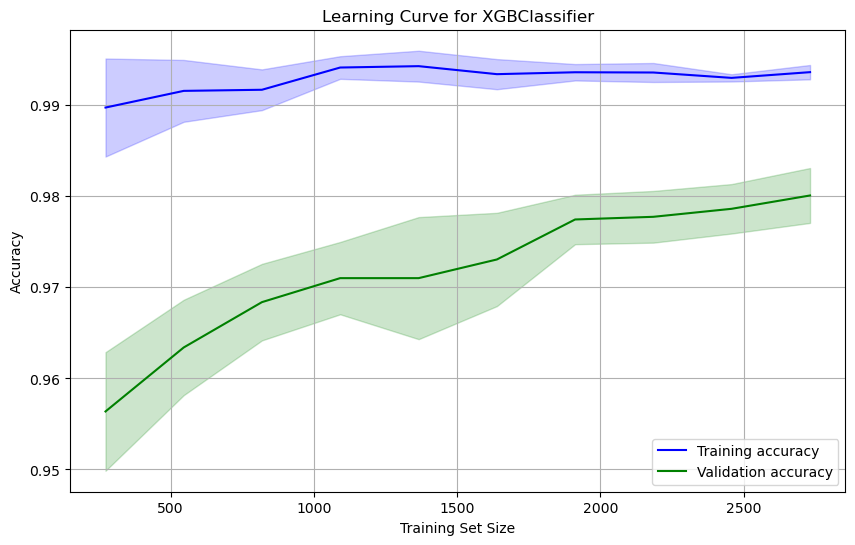

In [188]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label='Training accuracy', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Validation accuracy', color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.title('Learning Curve for XGBClassifier')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [ ]:
#SheNouda SAfwat...